In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("clinicaltrial_data.csv")
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug,clinical_trial,,on = "Mouse ID" )

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_df = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
mean_df = groupby_df.mean()
# Convert to DataFrame
avg_response_df = mean_df.reset_index()
# Preview DataFrame
avg_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_groupby = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
standard_error = standard_error_groupby.sem()
# Convert to DataFrame
standard_error_df = standard_error.reset_index()
# Preview DataFrame
standard_error_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
# Minor Data Munging to Re-Format the Data Frames
Minor_avg_df = avg_response_df.pivot(index="Timepoint",columns = "Drug",values= "Tumor Volume (mm3)")
Minor_se_df = standard_error_df.pivot(index="Timepoint",columns = "Drug",values= "Tumor Volume (mm3)")
# Preview that Reformatting worked
Minor_avg_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


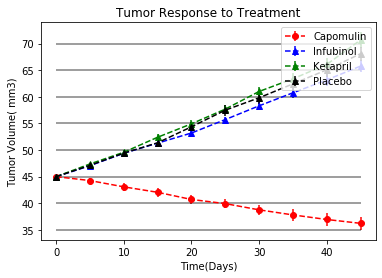

In [11]:
# Generate the Plot (with Error Bars)

plt.errorbar(Minor_avg_df.index, Minor_avg_df['Capomulin'], yerr=Minor_se_df['Capomulin'],label = 'Capomulin',marker = "o", color = "red" ,linestyle='dashed')
plt.errorbar(Minor_avg_df.index, Minor_avg_df['Infubinol'], yerr=Minor_se_df['Infubinol'],label ='Infubinol',marker = "^" ,color = "blue" ,linestyle='dashed')
plt.errorbar(Minor_avg_df.index, Minor_avg_df['Ketapril'], yerr=Minor_se_df['Ketapril'],label ='Ketapril',marker =  "^" , color = "green",linestyle='dashed' )
plt.errorbar(Minor_avg_df.index, Minor_avg_df['Placebo'], yerr=Minor_se_df['Placebo'],label ='Placebo',marker = "^"  , color = "black",linestyle='dashed' )




plt.legend(loc='upper right')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume( mm3)")
plt.hlines(np.arange(35,75,5),0,45,alpha=0.50)

# Save the Figure

fig.savefig("pymaceuticals_starter/Fig1.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupby_met = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]
mean_met_df = groupby_met.mean()

# Convert to DataFrame
met_response_df = mean_met_df.reset_index()
# Preview DataFrame
met_response_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met_groupby = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]
standard_error_met = standard_error_met_groupby.sem()
# Convert to DataFrame
standard_error_met_df = standard_error_met.reset_index()
# Preview DataFrame
standard_error_met_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [14]:
# Minor Data Munging to Re-Format the Data Frames
Minor_Data_met_df = met_response_df.pivot(index="Timepoint",columns = "Drug",values= "Metastatic Sites")
Minor_Data_se_df = standard_error_met_df.pivot(index="Timepoint",columns = "Drug",values= "Metastatic Sites")

# Preview that Reformatting worked
Minor_Data_se_df
Minor_Data_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


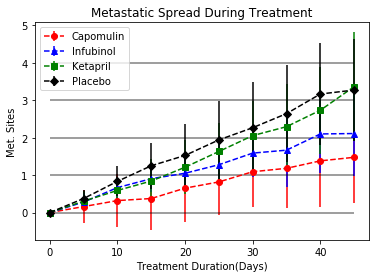

In [15]:
# Generate the Plot (with Error Bars)

plt.errorbar(Minor_Data_met_df.index, Minor_Data_met_df['Capomulin'], yerr=Minor_se_df['Capomulin'],label = 'Capomulin',marker = "o", color = "red" ,linestyle='--')
plt.errorbar(Minor_Data_met_df.index, Minor_Data_met_df['Infubinol'], yerr=Minor_se_df['Infubinol'],label ='Infubinol',marker = "^",color = "blue" ,linestyle='dashed')
plt.errorbar(Minor_Data_met_df.index, Minor_Data_met_df['Ketapril'], yerr=Minor_se_df['Ketapril'],label ='Ketapril',marker =  "s", color = "green",linestyle='dashed' )
plt.errorbar(Minor_Data_met_df.index, Minor_Data_met_df['Placebo'], yerr=Minor_se_df['Placebo'],label ='Placebo',marker = "D", color = "black",linestyle='dashed' )




plt.legend(loc='upper left')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.hlines(np.arange(0,5,),0,45,alpha = .50)
# Save the Figure
fig.savefig("pymaceuticals_starter/Fig2.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_groupby = combined_data.groupby(["Drug","Timepoint"])["Mouse ID"]
mice_count= mice_count_groupby.count()
# Convert to DataFrame
mice_count_df = mice_count.reset_index()
# Preview DataFrame
mice_count_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_minor_data= mice_count_df.pivot(index="Timepoint",columns = "Drug",values= "Mouse ID")

# Preview the Data Frame
mouse_minor_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


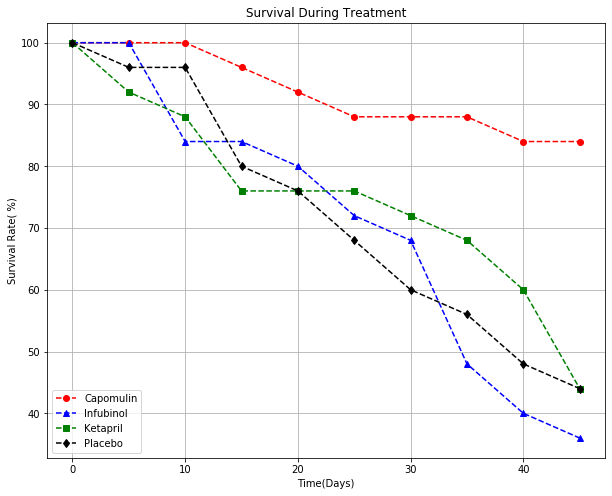

In [18]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,8))
plt.plot(100*mouse_minor_data['Capomulin'] / 25,label = 'Capomulin',marker = "o", color = "red" ,linestyle='dashed')
plt.plot(100*mouse_minor_data['Infubinol']/ 25,label = 'Infubinol',marker = "^" ,color = "blue" ,linestyle='dashed')
plt.plot(100*mouse_minor_data['Ketapril']/ 25, label = 'Ketapril',marker =  "s" , color = "green",linestyle='dashed' )
plt.plot(100*mouse_minor_data['Placebo']/ 25, label = 'Placebo',marker = "d"  , color = "black",linestyle='dashed' )



plt.grid(True)
plt.legend(loc='lower left')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate( %)")



# Save the Figure
fig.savefig("pymaceuticals_starter/Fig3.png")
# Show the Figure


plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

Drug_percent_change = ((Minor_avg_df.iloc[-1]-Minor_avg_df.iloc[0])/Minor_avg_df.iloc[0]*100)
# Display the data to confirm
Drug_percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

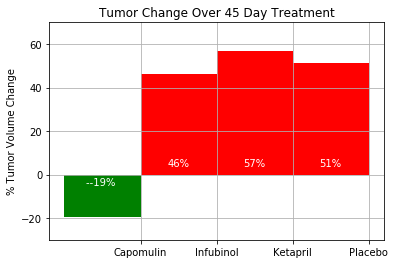

In [54]:
# Store all Relevant Percent Changes into a Tuple
rpc_tuple = (Drug_percent_change["Capomulin"],Drug_percent_change["Infubinol"],Drug_percent_change["Ketapril"], 
                                                                  Drug_percent_change["Placebo"])                                                              

# Splice the data between passing and failing drugs
fig,ax = plt.subplots()
ind= np.arange(len(rpc_tuple))
width = 1
rpc_pass = ax.bar(ind[0],rpc_tuple[0],width, color ='g')
rpc_fail = ax.bar(ind[1:],rpc_tuple[1:],width, color='r')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(ind+.5)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelPass(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -6,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
        

# Call functions to implement the function calls
autolabelPass(rpc_pass)
autolabelFail(rpc_fail)

# Save the Figure
fig.savefig("pymaceuticals_starter/Fig4.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)